In [38]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.datasets import load_iris, make_classification
from bayes_opt import BayesianOptimization
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

from __future__ import print_function
from __future__ import division

In [10]:
iris = load_iris()
data, target = iris.data, iris.target

In [65]:
def lrs(C):
    return cross_val_score(LogisticRegression(C=C), data, target, 'accuracy').mean()

In [68]:
lr = LogisticRegression(C=10)
lr.fit(data, target)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
lr.score(data, target)

0.96666666666666667

In [71]:
lrBO = BayesianOptimization(lrs, {'C': (0.001, 100)})

In [72]:
lrBO.maximize()

Initialization
-----------------------------------------
 Step |   Time |      Value |         C | 
    1 | 00m00s |    0.97386 |   93.6375 | 
    2 | 00m00s |    0.96691 |   58.8546 | 
    3 | 00m00s |    0.97386 |   62.1539 | 
    4 | 00m00s |    0.96691 |   33.0261 | 
    5 | 00m00s |    0.97386 |   61.0171 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         C | 
    6 | 00m00s |    0.97386 |   94.7814 | 
    7 | 00m00s |    0.97386 |   61.5451 | 
    8 | 00m00s |    0.97386 |   64.4003 | 
    9 | 00m00s |    0.97386 |   66.9469 | 
   10 | 00m00s |    0.97386 |   69.3501 | 
   11 | 00m00s |    0.97386 |   71.9190 | 
   12 | 00m00s |    0.97386 |   74.4516 | 
   13 | 00m00s |    0.97386 |   77.0018 | 
   14 | 00m00s |    0.97386 |   79.7457 | 
   15 | 00m00s |    0.97386 |   82.3657 | 
   16 | 00m00s |    0.97386 |   85.0340 | 
   17 | 00m00s |    0.97386 |   87.8130 | 
   18 | 00m00s |    0.97386 |   90.4960 | 
   19 | 00m00s |   

In [104]:
def f(x):
    return -x**4
fBO  = BayesianOptimization(f, {'x':(-1,1)})
fBO.maximize(init_points=5, n_iter=40)

Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |   -0.02346 |    0.3914 | 
    2 | 00m00s |   -0.23624 |   -0.6972 | 
    3 | 00m00s |   -0.00156 |   -0.1986 | 
    4 | 00m00s |   -0.00453 |    0.2594 | 
    5 | 00m00s |   -0.12886 |    0.5991 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    6 | 00m01s |   -0.00000 |   -0.0259 | 
    7 | 00m00s |   -0.00020 |   -0.1187 | 
    8 | 00m00s |   -0.00013 |    0.1069 | 
    9 | 00m00s |   -0.00000 |    0.0432 | 
   10 | 00m00s |   -0.00086 |    0.1714 | 
   11 | 00m00s |   -0.00063 |   -0.1584 | 
   12 | 00m00s |   -0.00002 |   -0.0697 | 
   13 | 00m00s |   -1.00000 |    1.0000 | 
   14 | 00m00s |   -0.02196 |   -0.3850 | 
   15 | 00m00s |   -0.00726 |   -0.2919 | 
   16 | 00m00s |   -1.00000 |   -1.0000 | 
   17 | 00m00s |   -0.06911 |   -0.5127 | 
   18 | 00m00s |   -0.00000 |    0.0100 | 
   19 | 00m00s |   

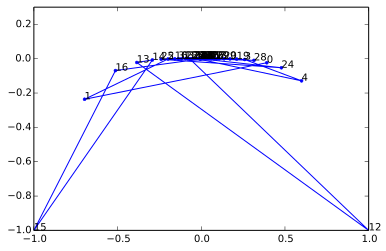

In [105]:
ax = plt.gca()
ax.set_xlim(-1,1)
ax.set_ylim(-1, 0.3)
for i, xy in enumerate(zip(fBO.X, fBO.Y)):
    ax.text(xy[0], xy[1], str(i))
plt.plot(fBO.X, fBO.Y, '.-')

In [106]:
fBO.Y.max()

-1.156570557575263e-11

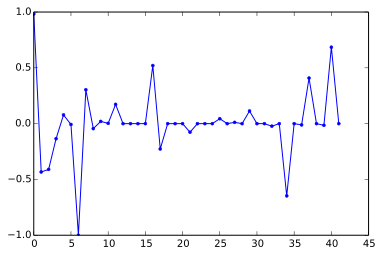

In [100]:
plt.plot(fBO.X, '.-')